<a href="https://colab.research.google.com/github/mingd00/Algorithm/blob/main/1_01_my_first_cnn_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First Convolutional Neural Network : MNIST
---
## 일단 Quick 하게

코드는 정말 수루룩 끝난다!

그래서 다시 한 번! 아래 그림을 보고 구조를 확실히 추적할 수 있어야 한다.

* [Ex1](https://cdn-images-1.medium.com/max/1600/1*O9ulXVmjBustHGLi1zRthA.png)
* [Ex2](https://cdn-images-1.medium.com/max/1600/1*jqKHgwZ8alM3K_JRYO_l4w.png)



### Keras Upgrade

In [ ]:
!pip install keras-nightly

### 라이브러리 로딩

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import keras

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 7146
다음 그림은 숫자 8 입니다.


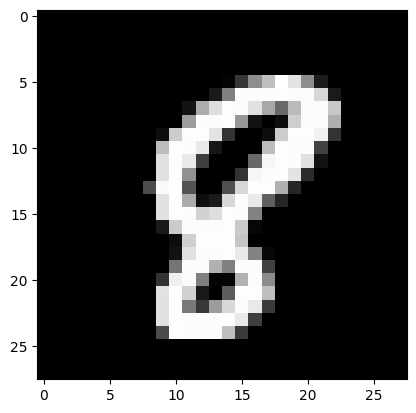

In [ ]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0, 10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')
plt.imshow(test_x[id], cmap='gray')
plt.show()

### Convolutional Layer를 사용하기 위한 reshape!

- **채널이 추가되어야 한다**

In [ ]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

In [ ]:
train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

* 이미지가 0 ~ 1 사이 값을 갖도록 스케일 조정!

In [ ]:
print(f'max: {train_x.max()}, min: {train_x.min()}')

max: 255, min: 0


In [ ]:
# train_x = train_x / 255.
# test_x = test_X / 255.

In [ ]:
max_n, min_n = train_x.max(), train_x.min()

In [ ]:
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [ ]:
print(f'max : {train_x.max()} , min : {train_x.min()}')

max : 1.0 , min : 0.0


* One-hot Encoding

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_y.shape, test_y.shape

((60000,), (10000,))

In [ ]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
classes_n = len(np.unique(train_y))
classes_n

10

In [ ]:
## 반복 실행 주의!

train_y_hot = to_categorical(train_y, classes_n)
test_y_hot = to_categorical(test_y, classes_n)

In [ ]:
train_x.shape, train_y_hot.shape

((60000, 28, 28, 1), (60000, 10))

## 모델링

- Sequential API, Functional API 중 택일
- CNN에 관한 것만 추가가 된다.
[여기](https://keras.io/layers/convolutional/)를 적극적으로 참고하자.

In [ ]:
import keras
from keras.utils import clear_session
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout

In [ ]:
# Sequential API

clear_session()

model = Sequential()

model.add( Input(shape=(28, 28, 1)))

# ------------------------------------------------------------------------------------

model.add( Conv2D(filters=32, # 서로 다른 필터 32개 사용
                  kernel_size=(3, 3), # Conv2D filter의 가로, 세로 사이즈
                  strides=(1, 1), # Conv2D filter의 이동 보폭
                  padding='same', # 앞전 filter map 사이즈 유지, 외곽 정보를 더 반영
                  activation='relu'))

model.add( Conv2D(filters=32, # 서로 다른 필터 32개 사용
                  kernel_size=(3, 3), # Conv2D filter의 가로, 세로 사이즈
                  strides=(1, 1), # Conv2D filter의 이동 보폭
                  padding='same', # 앞전 filter map 사이즈 유지, 외곽 정보를 더 반영
                  activation='relu'))

model.add( MaxPool2D(pool_size=(2, 2),
                     strides=(2, 2)))

model.add( BatchNormalization() )
model.add( Dropout(0.3))

# ------------------------------------------------------------------------------------

model.add( Conv2D(filters=64, # 서로 다른 필터 32개 사용
                  kernel_size=(3, 3), # Conv2D filter의 가로, 세로 사이즈
                  strides=(1, 1), # Conv2D filter의 이동 보폭
                  padding='same', # 앞전 filter map 사이즈 유지, 외곽 정보를 더 반영
                  activation='relu'))

model.add( Conv2D(filters=64, # 서로 다른 필터 32개 사용
                  kernel_size=(3, 3), # Conv2D filter의 가로, 세로 사이즈
                  strides=(1, 1), # Conv2D filter의 이동 보폭
                  padding='same', # 앞전 filter map 사이즈 유지, 외곽 정보를 더 반영
                  activation='relu'))

model.add( MaxPool2D(pool_size=(2, 2),
                     strides=(2, 2)))

model.add( BatchNormalization())
model.add( Dropout(0.3))

# ------------------------------------------------------------------------------------

model.add( Flatten())
model.add( Dense(64))
model.add( Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,794 (1.02 MB)

 Trainable params: 266,602 (1.02 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# Functional API

clear_session()

il = Input(shape=(28, 28, 1))

# ------------------------------------------------------------------------------------

hl = Conv2D(filters=32,
            kernel_size=(3, 3),
            strides=(1, 1),
            padding='same',
            activation='relu')(il)
hl = Conv2D(filters=32,
            kernel_size=(3, 3),
            strides=(1, 1),
            padding='same',
            activation='relu')(hl)
hl = MaxPool2D(pool_size=(2, 2),
               strides=(2, 2))(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.3)(hl)

# ------------------------------------------------------------------------------------

hl = Conv2D(filters=64,
            kernel_size=(3, 3),
            strides=(1, 1),
            padding='same',
            activation='relu')(hl)
hl = Conv2D(filters=64,
            kernel_size=(3, 3),
            strides=(1, 1),
            padding='same',
            activation='relu')(hl)
hl = MaxPool2D(pool_size=(2, 2),
               strides=(2, 2))(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.3)(hl)

# ------------------------------------------------------------------------------------

hl = Flatten()(hl)
hl = Dense(64)(hl)
ol = Dense(10, activation='softmax')(hl)

model2 = Model(il, ol)

model2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,794 (1.02 MB)

 Trainable params: 266,602 (1.02 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## Early Stopping

from keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss',       # 얼리스토핑을 적용할 관측 지표
                   min_delta=0,              # 임계값. monitor에서 지정한 지표가 min_delta의 값보다 크게 변해야 성능 개선으로 간주
                   patience=5,               # 성능 개선이 발생하지 않을 때, 얼마나 더 지켜볼 것인지.
                   verbose=1,                # 얼리스토핑 적용 문구
                   restore_best_weights=True,# 최적의 가중치를 가진 epoch 시점으로 되돌림
                   )

In [ ]:
hist = model.fit(train_x, train_y_hot, validation_split=.2, epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.9072 - loss: 0.3809 - val_accuracy: 0.9791 - val_loss: 0.0935
Epoch 2/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9785 - loss: 0.0837 - val_accuracy: 0.9849 - val_loss: 0.0556
Epoch 3/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9828 - loss: 0.0604 - val_accuracy: 0.9870 - val_loss: 0.0499
Epoch 4/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9850 - loss: 0.0501 - val_accuracy: 0.9877 - val_loss: 0.0464
Epoch 5/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9879 - loss: 0.0379 - val_accuracy: 0.9885 - val_loss: 0.0402
Epoch 6/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9900 - loss: 0.0319 - val_accuracy: 0.9892 - val_loss: 0.0385
Epoch 7/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9891 - loss: 0.0344 - val_accuracy: 0.9884 - val_loss: 0.0418
Epoch 8/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.989

In [ ]:
performance_test = model.evaluate(test_x, test_y_hot)

print(f'Test Loss : {performance_test[0]:.6f} | Test Accuracy : {performance_test[1]*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9902 - loss: 0.0303
Test Loss : 0.024047 | Test Accuracy : 99.27%


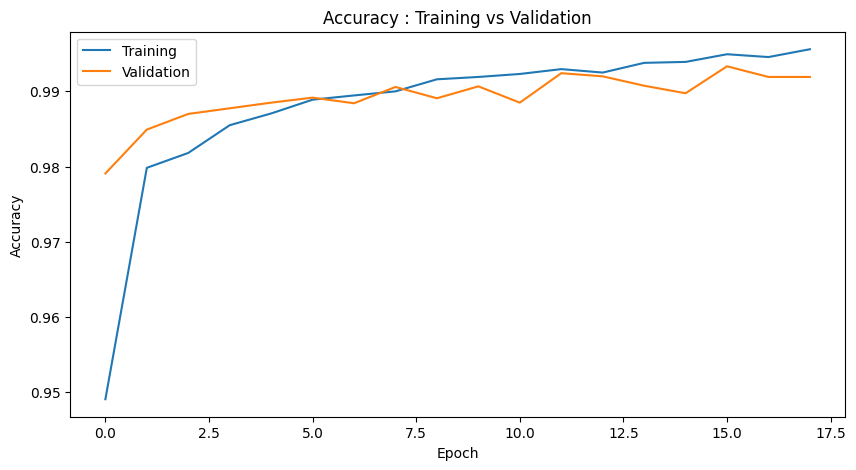

In [ ]:
if not isinstance(hist, dict) :
    history = hist.history

plt.figure(figsize=(10, 5))
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

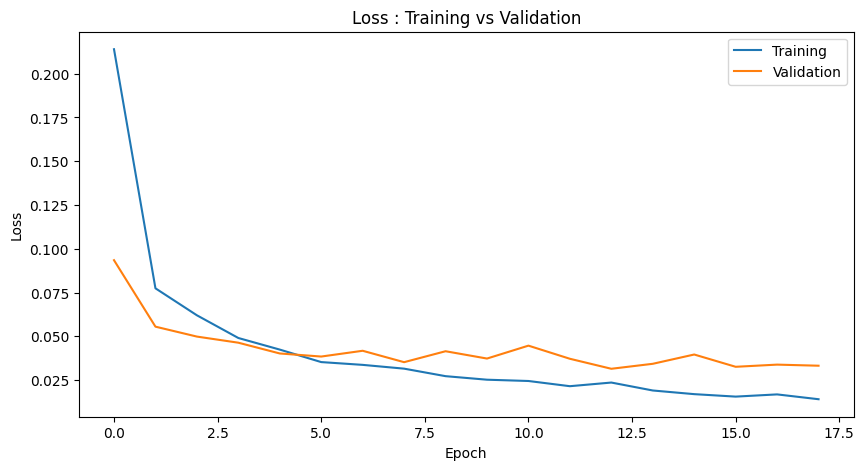

In [ ]:
if not isinstance(hist, dict) :
    history = hist.history

plt.figure(figsize=(10, 5))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

* 예측값 생성

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

train_y_arg = train_y_hot.argmax(axis=1)
test_y_arg = test_y_hot.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y_arg, single_pred_train)
logi_test_accuracy = accuracy_score(test_y_arg, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%' )
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%' )

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
CNN
트레이닝 정확도 : 99.57%
테스트 정확도 : 99.27%


## 숫자 이미지 시각화

id = 3095
다음 그림은 숫자 5 입니다.
모델의 예측 : 5
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0. 99.  0.  0.  0.  0.]
정답입니다


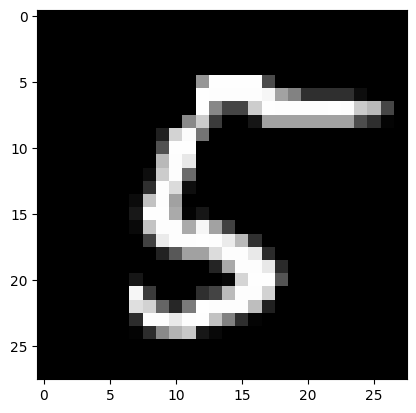

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y_arg[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y_arg[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

id = 9729
다음 그림은 숫자 5 입니다.
모델의 예측 : 6
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0.  0. 99.  0.  0.  0.]
틀렸어요


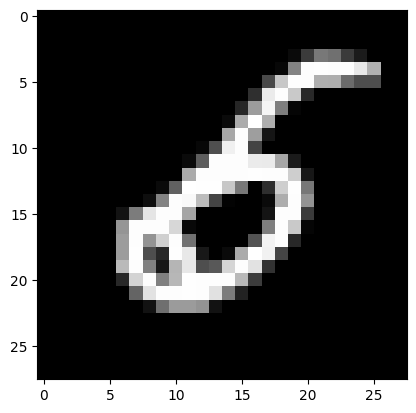

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y_arg==single_pred_test)
f_id = np.where(true_false==False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y_arg[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y_arg[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()